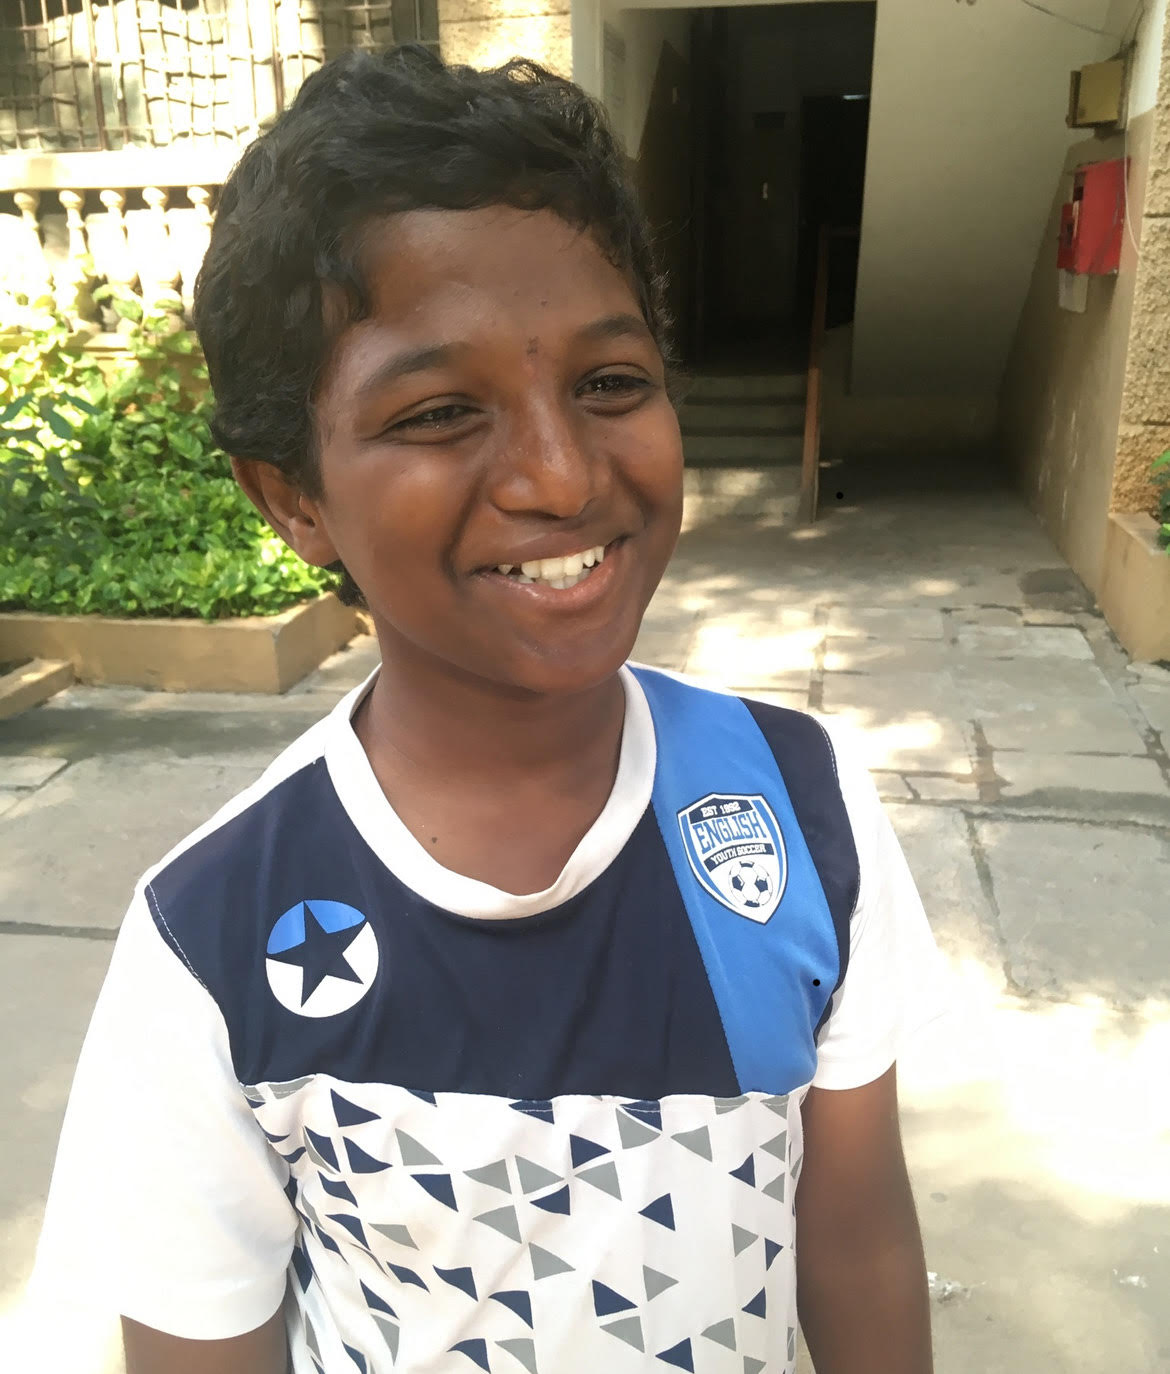

In [8]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/emotion_detection/test_image_2.jpg",
                 cv2.IMREAD_COLOR)
cv2_imshow(img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Emotion Detection

In [ ]:
from deepface import DeepFace

24-02-03 08:09:25 - Directory /root/.deepface created
24-02-03 08:09:25 - Directory /root/.deepface/weights created


In [ ]:
face_analysis = DeepFace.analyze(img_path = "/content/drive/MyDrive/emotion_detection/test_image_2.jpg")

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


#### Run from SRC

In [2]:
Face = FaceDetection(path_to_image = "/content/drive/MyDrive/emotion_detection/test_image_2.jpg")
result = Face.analyse_image()

Action: race: 100%|██████████| 4/4 [00:36<00:00,  9.12s/it]


## Source Code

In [1]:
from deepface import DeepFace
import json

class FaceDetection:

    def __init__(self, path_to_image, model=None):
        self.path = path_to_image
        if model is not None:
            self.model = model

    def run_model(self):
        return DeepFace.analyze(img_path = self.path)

    def analyse_image(self):
        self.result = self.run_model()
        self.emotion_details = self.result[0]['emotion']
        self.emotion = self.result[0]['dominant_emotion']
        self.emotion_confidence = int(self.emotion_details[self.emotion])
        self.face_region = self.result[0]['region']
        self.race_details = self.result[0]['race']
        self.race = self.result[0]['dominant_race']
        self.race_confidence = int(self.race_details[self.race])
        self.gender = self.result[0]['dominant_gender']
        self.gender_confidence = self.result[0]['gender'][self.gender]

        return json.dumps({
            'emotion_details': {'emotion': self.emotion,
                                'confidence': self.emotion_confidence,
                                'analysis': self.emotion_details},
            'face_details': {'bbox': self.face_region},
            'race_details': {'race': self.race,
                             'confidence': self.race_confidence},
            'gender_details': {'gender': self.gender,
                               'confidence': self.gender_confidence}

        })



    def view_image(self):
        pass

In [4]:
result

'{"emotion_details": {"emotion": "happy", "confidence": 99, "analysis": {"angry": 5.9515332395676523e-05, "disgust": 1.3774213714068395e-08, "fear": 6.387907092175737e-07, "happy": 99.92632269859314, "sad": 0.07263207226060331, "surprise": 1.588007919606227e-08, "neutral": 0.0009860500540526118}}, "face_details": {"bbox": {"x": 311, "y": 236, "w": 431, "h": 431}}, "race_details": {"race": "black", "confidence": 99}, "gender_details": {"gender": "Man", "confidence": 97.30709195137024}}'

In [18]:
Face.confidence

99

## Dependencies

#### Run this before the analysis

In [8]:
!pip install deepface
!pip install opencv-python